<a href="https://colab.research.google.com/github/nimratkhalsa/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Reggression**

## Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

## Downloading Data

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-08-21 07:30:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2024-08-21 07:30:46 (728 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Reading the Data

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Selecting Columns for Multiple Regression

In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

## Plotting Emission Values w.r.t Engine Size

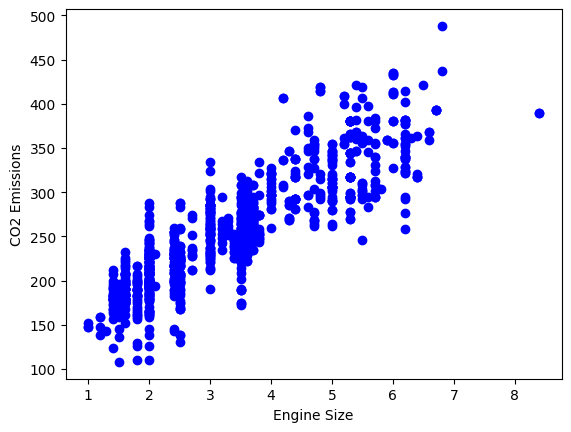

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

## Creating train and test dataset

In [6]:
msk = np.random.rand(len(df)) < 0.9
train = cdf[msk]
test = cdf[~msk]

## Train Data Distribution

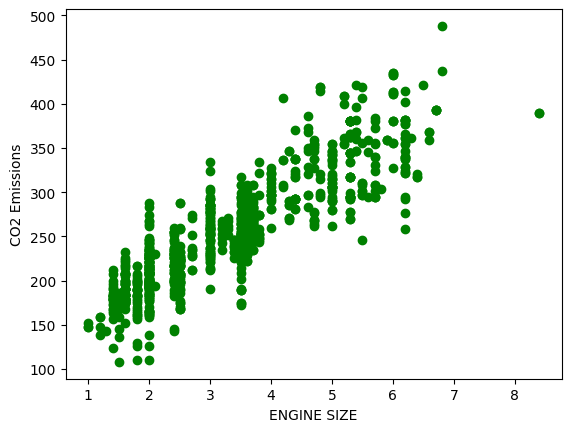

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 Emissions')
plt.show()

## Multiple Regression Model

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
reg.fit(x, y)

print("Coefficients: ", reg.coef_)

Coefficients:  [[11.53331231  7.04813364  9.46564856]]


## OLS (Ordinary Least Squares)

Trying to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.



## Prediction

In [9]:
from sklearn.metrics import r2_score

y_hat = reg.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_x = np.asarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asarray(test[['CO2EMISSIONS']])

# MSE
print("MSE: %.2f" % np.mean((y_hat - test_y) ** 2))

# Variance Score
print("Variance Score: %.2f" % reg.score(test_x, test_y))

# R2 Score
print("R2 Score: %.2f" % r2_score(test_y, y_hat))

MSE: 595.93
Variance Score: 0.84
R2 Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [10]:
# Checking with random data
z = reg.predict([[10, 4, 9.7], [12, 6, 6.7]])
print(z)

[[302.60391874]
 [311.36986495]]
